### **Energy-Consumption-Prediction**
Using Regession Analysis

### Project Description
The aim is to build a predictive model on consumption of energy.

### Features: 

**OSEBuildingID**: Unique Building ID

**BuildingType**: Type of Building

**PrimaryPropertyType**: Type of the Primary Property

**PropertyName**: Name of the Building

**Latitude**: Site Latitude

**Longitude**: Site Longitude

**YearBuilt**: The year of Built

**NumberofBuildings**: The Number of buildings

**NumberofFloors**: The Number of Floors

**PropertyofGFATotal**: Property GFA Total

**PropertyofGFAParking**: Property GFA of Parking

**PropertyofGFABuilding(s)**: Property GFA of Buildings

**LargestPropertyUseType**: Type of use of the largest property

**ENERGYSTARScore**: Score of the energy

**SiteEnergyUse(kBtu)**: Amount of Energy recorded on Site

**SiteEnergyUseWN(kBtu)**: Amount of Energy recorded on Site. This is the outcome variable to be predicted.

**Electricity(kWh)**: Amount of Electricity Used

### Data Exploration: 
   Looking at categorical and continuous feature summaries and making inferences about the data.
### Data Cleaning:
   Imputing missing values in the data and checking for outliers
### Feature Engineering:
   Odifying existing variables and creating new ones for analysis
### Model Building:
   Making predictive models on the data
### Metrics:
   Check the effectiveness of our predictive models

---

## **Importing the librairies**

We are going to import the essentials librairies that we'll use to visualize the dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

***Importing the dataset***

By using Pandas, We'll import the dataset

In [2]:
# reading the dataset
energy = pd.read_csv("batiment.csv", sep=",")

# making copies of our dataset
energy = energy.copy()

# displaying the first five lines of our dataset
energy.head()

,OSEBuildingID,BuildingType,PrimaryPropertyType,PropertyName,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,ENERGYSTARScore,SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),Electricity(kWh)
0,1,NonResidential,Hotel,Mayflower park hotel,47.61220,-122.33799,1927,1.0,12,88434,0,88434,Hotel,60.0,7226362.5,7456910.0,1.156514e+06
1,2,NonResidential,Hotel,Paramount Hotel,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,Hotel,61.0,8387933.0,8664479.0,9.504252e+05
2,3,NonResidential,Hotel,5673-The Westin Seattle,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,Hotel,43.0,72587024.0,73937112.0,1.451544e+07
3,5,NonResidential,Hotel,HOTEL MAX,47.61412,-122.33664,1926,1.0,10,61320,0,61320,Hotel,56.0,6794584.0,6946800.5,8.115253e+05
4,8,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),47.61375,-122.34047,1980,1.0,18,175580,62000,113580,Hotel,75.0,14172606.0,14656503.0,1.573449e+06


***Now That the Dataset is successufully Imported, Let's describe our Dataset***

In [3]:
# checking the columns of the dataset
print(energy.columns)

Index(['OSEBuildingID', 'BuildingType', 'PrimaryPropertyType', 'PropertyName',
       'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'LargestPropertyUseType', 'ENERGYSTARScore',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'Electricity(kWh)'],
      dtype='object')


In [4]:
# Checking the shape of the dataset
print(energy.shape)

(3376, 17)


***The Dataset contains 3376 rows & 17 columns as we seen above. Here We are going to check the first Statistical data of the dataset.***

In [5]:
# describing briefly the dataset
energy.describe()

,OSEBuildingID,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ENERGYSTARScore,SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),Electricity(kWh)
count,3376.000000,3376.000000,3376.000000,3376.000000,3368.000000,3376.000000,3.376000e+03,3376.000000,3.376000e+03,2533.000000,3.371000e+03,3.370000e+03,3.367000e+03
mean,21208.991114,47.624033,-122.334795,1968.573164,1.106888,4.709123,9.483354e+04,8001.526066,8.683201e+04,67.918674,5.403667e+06,5.276726e+06,1.086639e+06
std,12223.757015,0.047758,0.027203,33.088156,2.108402,5.494465,2.188376e+05,32326.723928,2.079398e+05,26.873271,2.161063e+07,1.593879e+07,4.352478e+06
min,1.000000,47.499170,-122.414250,1900.000000,0.000000,0.000000,1.128500e+04,0.000000,3.636000e+03,1.000000,0.000000e+00,0.000000e+00,-3.382680e+04
25%,19990.750000,47.599860,-122.350662,1948.000000,1.000000,2.000000,2.848700e+04,0.000000,2.775600e+04,53.000000,9.251286e+05,9.701822e+05,1.874229e+05
50%,23112.000000,47.618675,-122.332495,1975.000000,1.000000,4.000000,4.417500e+04,0.000000,4.321600e+04,75.000000,1.803753e+06,1.904452e+06,3.451299e+05
75%,25994.250000,47.657115,-122.319407,1997.000000,1.000000,5.000000,9.099200e+04,0.000000,8.427625e+04,90.000000,4.222455e+06,4.381429e+06,8.293178e+05
max,50226.000000,47.733870,-122.220966,2015.000000,111.000000,99.000000,9.320156e+06,512608.000000,9.320156e+06,100.000000,8.739237e+08,4.716139e+08,1.925775e+08


## **DATA VISUALIZATION**

Visualization is an important part of the process for undestanding our dataset. So We are going to visualize some features.

### ***Univariate Data Analysis***

Visualizing the distribution of SiteEnergyUse (the outcome)

Text(0.5, 1.0, 'Distribution of SiteEnergyUse')

<Figure size 1080x360 with 0 Axes>

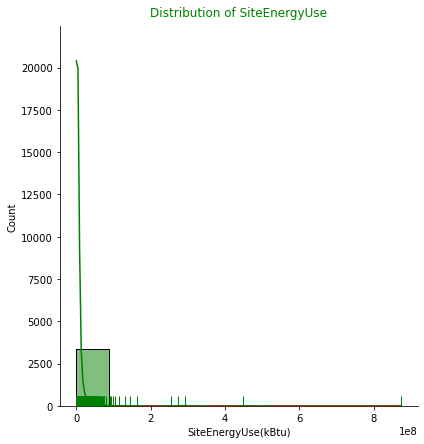

In [6]:
#Setting figure size for the notebook
plt.figure(figsize=(15,5))

#Plotting SiteEnergyUse(kBtu)
sns.displot(energy['SiteEnergyUse(kBtu)'], bins=10, kde=True, rug=True, color='green', height=6, aspect=1)

#set title of the plot
plt.title('Distribution of SiteEnergyUse', 
          fontdict = {'verticalalignment': 'baseline', 'color': 'green'},
          loc='center', pad=10.0)

**Conclusion:** We notice that SiteEnergyUse(kBtu) is highly asymmetric.

Visualizing SiteEnergyUse with boxplot

<AxesSubplot:title={'right':'Visualization of SiteEnergyUse With Boxplot'}, xlabel='SiteEnergyUse(kBtu)'>

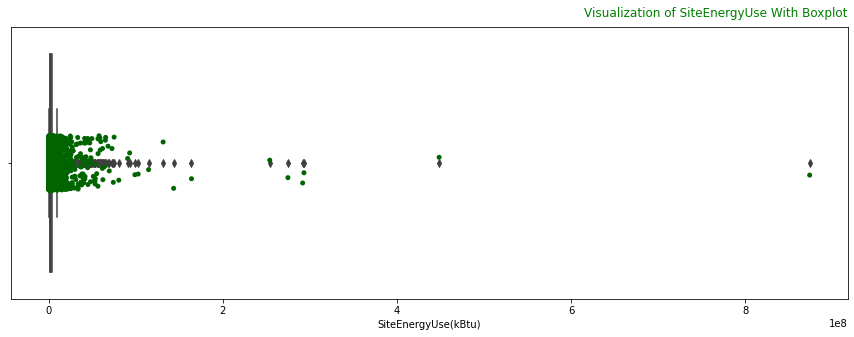

In [7]:
#Setting figure size for the notebook
plt.figure(figsize=(15,5))

#set title of the plot
plt.title('Visualization of SiteEnergyUse With Boxplot', color='green',
          loc='right', pad=10.0)

# Plotting SiteEnergyUse(kBtu)
sns.boxplot(x =energy['SiteEnergyUse(kBtu)'])
sns.stripplot(x = energy['SiteEnergyUse(kBtu)'], color = 'darkgreen')

Visualizing Electricity with boxplot

<AxesSubplot:title={'right':'Visualization of Electricity With Boxplot'}, xlabel='Electricity(kWh)'>

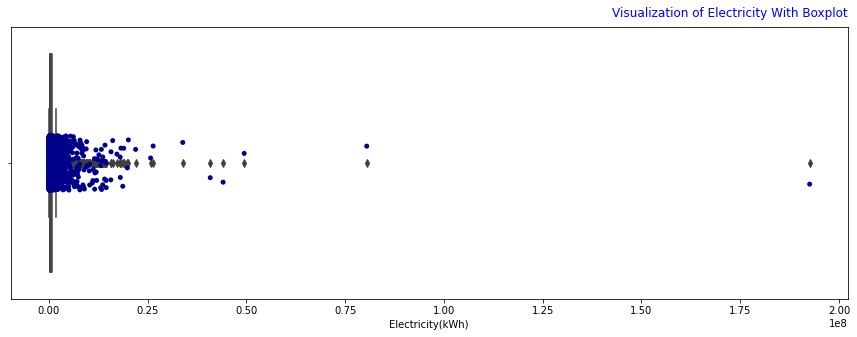

In [8]:
#Setting figure size for the notebook
plt.figure(figsize=(15,5))

# set title of the plot
plt.title('Visualization of Electricity With Boxplot', color='blue',
          loc='right', pad=10.0)

# Plotting Electricity(kWh)
sns.boxplot(x =energy['Electricity(kWh)'])
sns.stripplot(x = energy['Electricity(kWh)'], color = 'darkblue')

Visualizing ENERGYSTARScore with boxplot

<AxesSubplot:title={'right':'Visualization of ENERGYSTARScore With Boxplot'}, xlabel='ENERGYSTARScore'>

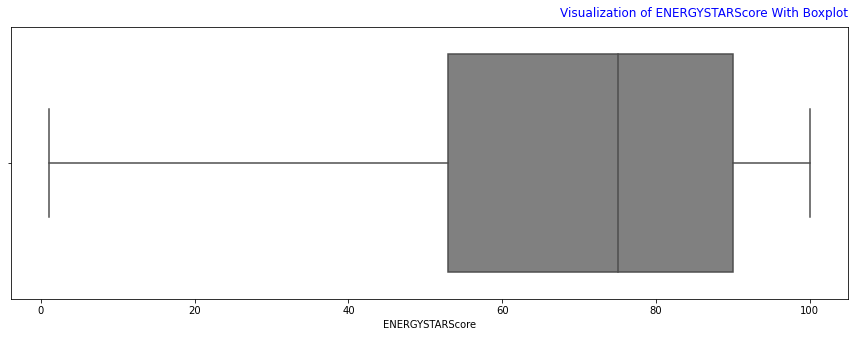

In [9]:
#Setting figure size for the notebook
plt.figure(figsize=(15,5))

#set title of the plot
plt.title('Visualization of ENERGYSTARScore With Boxplot', color='blue',
          loc='right', pad=10.0)

# Plotting ENERGYSTARScore
sns.boxplot(x =energy['ENERGYSTARScore'], color='gray')

Visualizing the type of Building

Text(0.5, 1.0, 'Visualization of the Type of Buildings')

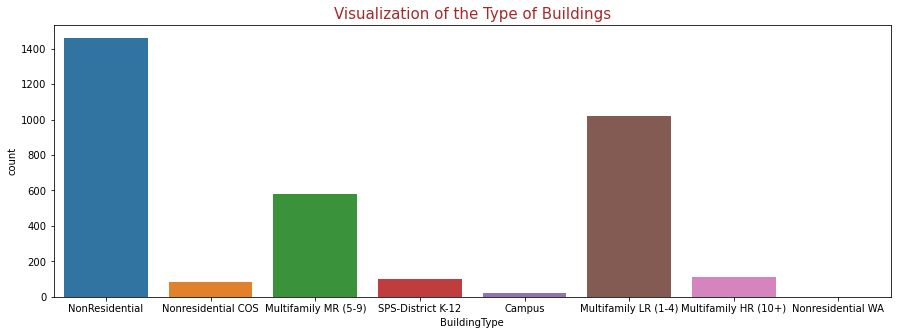

In [10]:
#Setting figure size for the notebook
plt.figure(figsize=(15,5))

#Plotting BuildingType
ax = sns.countplot(x=energy['BuildingType'])

# set title of the plot
ax.set_title("Visualization of the Type of Buildings", color='Brown', fontsize = 15)

Visualizing the primary type of Building

Text(0.5, 1.0, 'Visualization of the Primary Property Type')

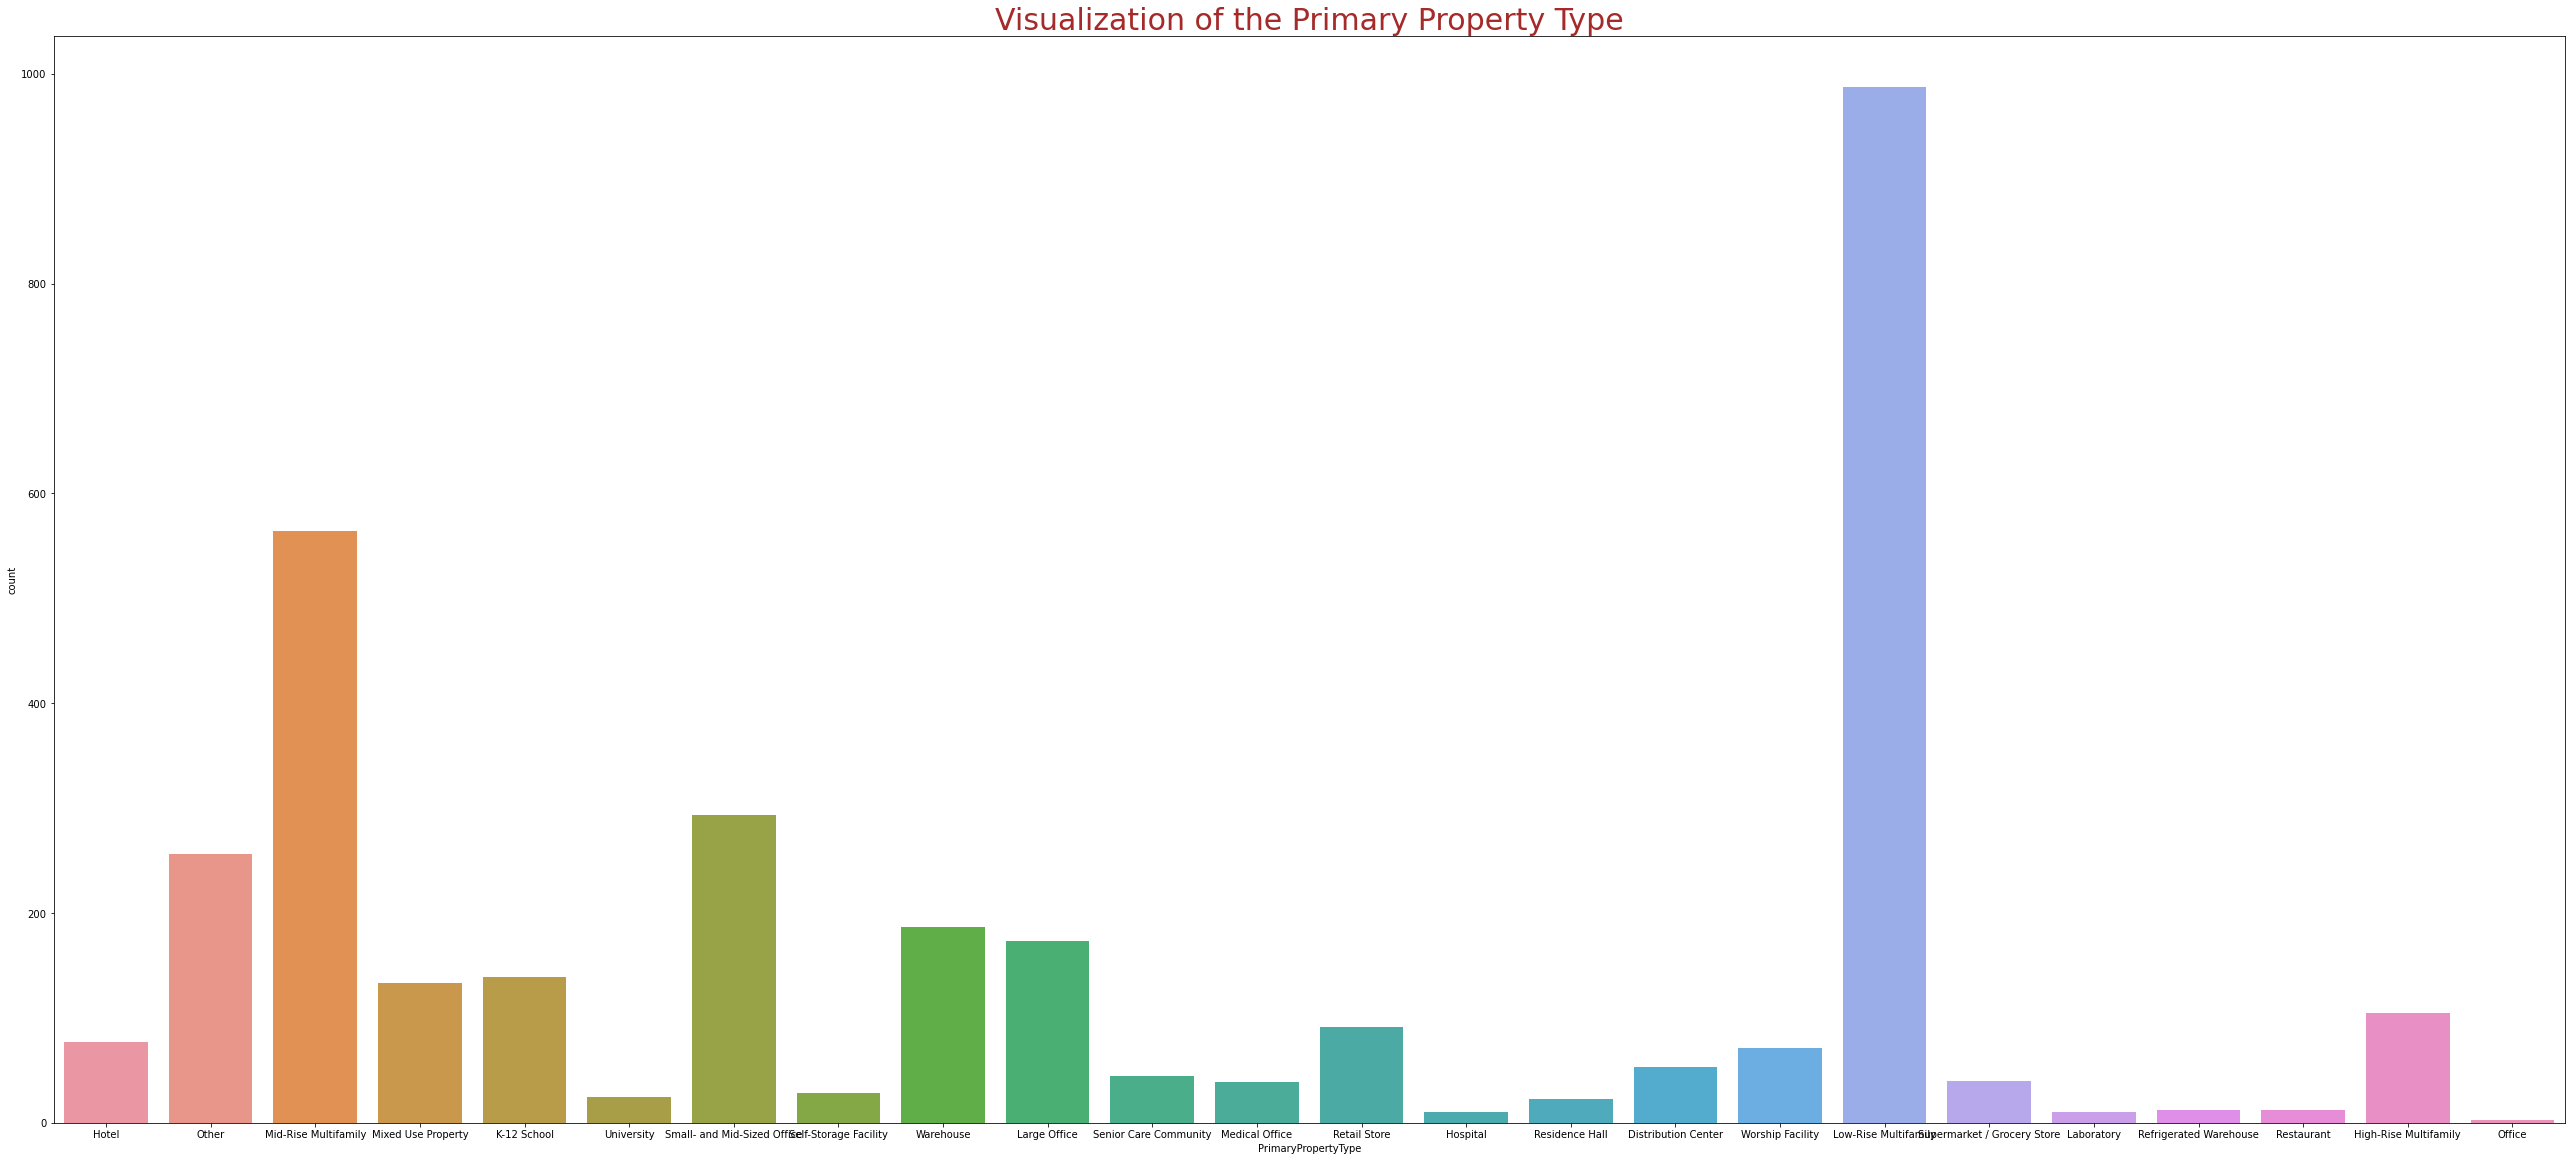

In [11]:
#Setting figure size for the notebook
plt.figure(figsize=(45,20))

#Plotting PrimaryPropertyType
ax = sns.countplot(x=energy['PrimaryPropertyType'])

#Set title of the plot
ax.set_title("Visualization of the Primary Property Type", color='brown', fontsize = 30)

**- Bivariate Data Analysis**

Visualizing SiteEnergy Use of Buildings

<AxesSubplot:title={'right':'Visualization the behavior of Energy Use with Building'}, xlabel='BuildingType', ylabel='SiteEnergyUse(kBtu)'>

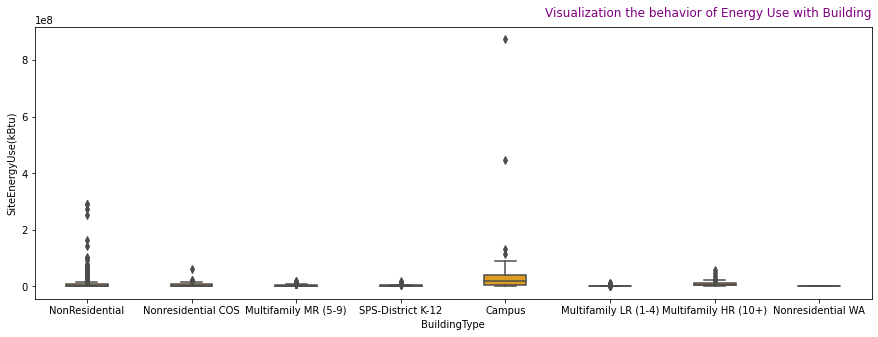

In [12]:
#Setting figure size for the notebook
plt.figure(figsize=(15,5))

#Set title of the plot
plt.title('Visualization the behavior of Energy Use with Building', color = 'purple',
          loc='right', pad=10.0)

# Ploting BuildingType with SiteEnergyUse
sns.boxplot(x=energy['BuildingType'], y=energy['SiteEnergyUse(kBtu)'], color='orange', width=0.4)

Visualizing the Distribution of Year based on PrimaryPropertyType

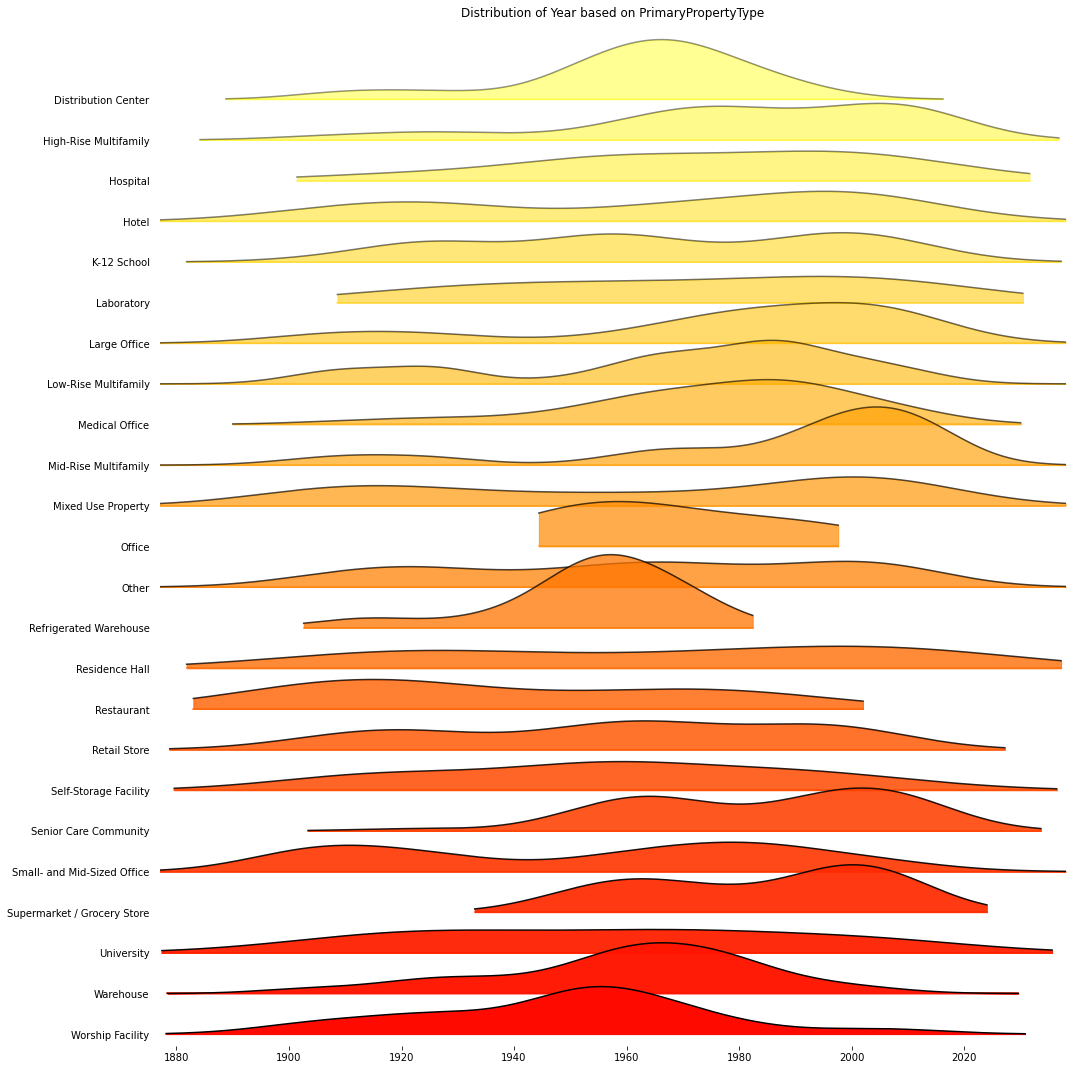

In [13]:
#Importing the librarie Joypy 
from joypy import joyplot
from matplotlib import cm

#Plotting the PrimaryPropertyType & YearBuilt
joyplot(energy, by = 'PrimaryPropertyType', column = 'YearBuilt', kind="kde", colormap = cm.autumn_r, fade = True, 
        range_style='own', figsize = (15,15), 
        title = 'Distribution of Year based on PrimaryPropertyType')

# display
plt.show()

Checking the number of Buildings by Type

<AxesSubplot:title={'right':'Visualization the behavior of Number of Buildings by Type'}, xlabel='BuildingType', ylabel='NumberofBuildings'>

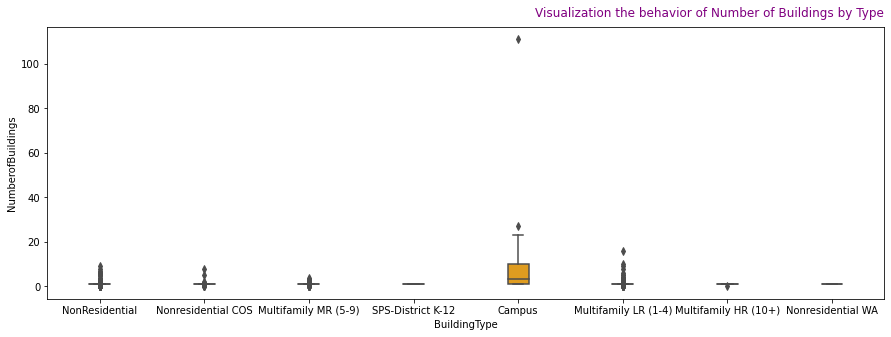

In [14]:
#Setting figure size for the notebook
plt.figure(figsize=(15,5))

#Set title of the plot
plt.title('Visualization the behavior of Number of Buildings by Type', color = 'purple',
          loc='right', pad=10.0)

# PLotting BuildingType with NumberofBuildings
sns.boxplot(x=energy['BuildingType'], y=energy['NumberofBuildings'], color='orange', width=0.2)

Visualizing the behavior of the PropertyGFATotal with ENERGYSTARScore by BuildingType

<AxesSubplot:title={'right':'Visualization the behavior of PropertyGFATotal with ENERGYSTARScore by Building'}, xlabel='PropertyGFATotal', ylabel='ENERGYSTARScore'>

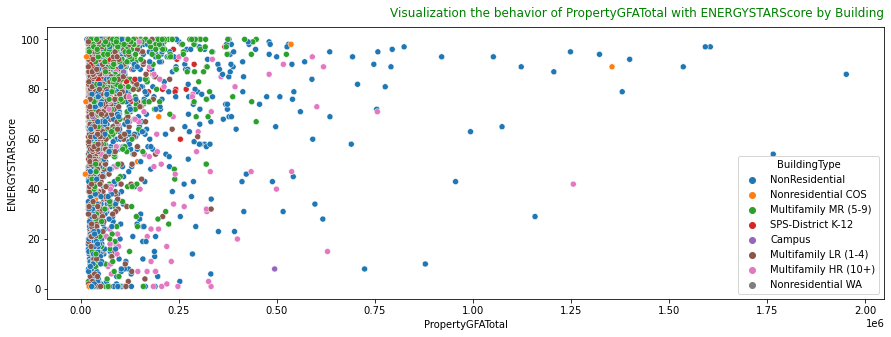

In [15]:
#Set title of the plot
plt.figure(figsize=(15,5))

#Set title of the plot
plt.title('Visualization the behavior of PropertyGFATotal with ENERGYSTARScore by Building', color ='green',
          loc='right', pad=10.0)

# PLotting PropertyGFATotal with ENERGYSTARScore by BuildingType
sns.scatterplot(x=energy['PropertyGFATotal'], y=energy['ENERGYSTARScore'], hue=energy['BuildingType'])

Visualizing the behavior of the BuildingType with ENERGYSTARScore by Building Type

<AxesSubplot:title={'right':'Visualization the behavior of BuildingType with ENERGYSTARScore by Building'}, xlabel='BuildingType', ylabel='ENERGYSTARScore'>

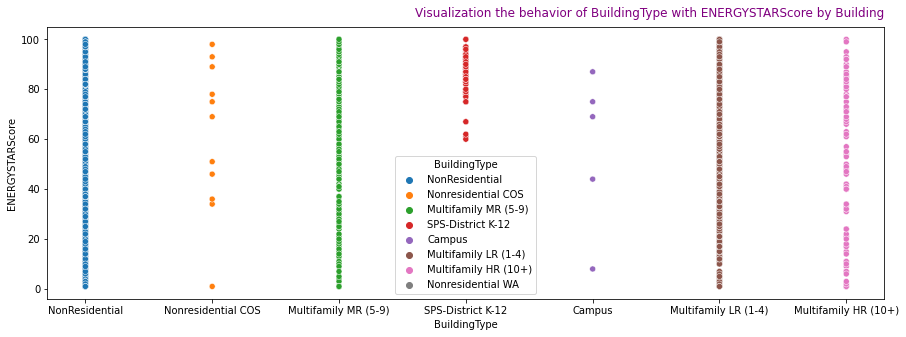

In [16]:
#Setting figure size for the notebook
plt.figure(figsize=(15,5))

#Set title of the plot
plt.title('Visualization the behavior of BuildingType with ENERGYSTARScore by Building', color = 'purple',
          loc='right', pad=10.0)

#PLotting BuildingType with ENERGYSTARScore by BuildingType
sns.scatterplot(x=energy['BuildingType'], y=energy['ENERGYSTARScore'], hue=energy['BuildingType'])

Visualizing the behavior of the YearBuilt with SiteEnergyUse(kBtu) by BuildingType

<AxesSubplot:title={'right':'Visualization the behavior of YearBuilt with SiteEnergyUse(kBtu) by BuildingType'}, xlabel='YearBuilt', ylabel='SiteEnergyUse(kBtu)'>

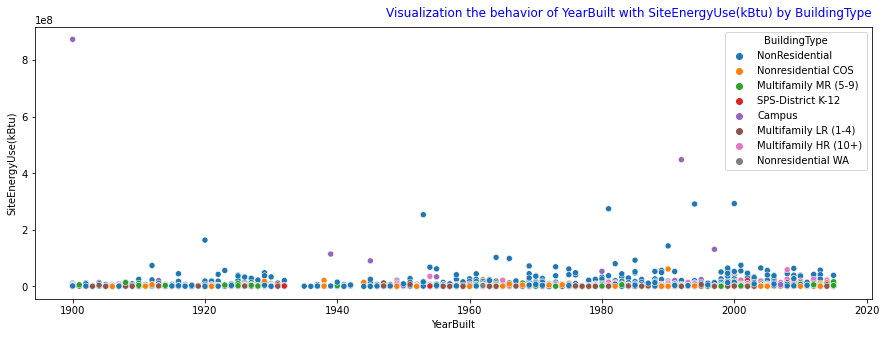

In [17]:
#Setting figure size for the notebook
plt.figure(figsize=(15,5))

#Set title of the plot
plt.title('Visualization the behavior of YearBuilt with SiteEnergyUse(kBtu) by BuildingType', color ='blue',
          loc='right', pad=10.0)

#PLotting YearBuilt with SiteEnergyUse(kBtu) by BuildingType
sns.scatterplot(x=energy['YearBuilt'], y=energy['SiteEnergyUse(kBtu)'], hue=energy['BuildingType'])

Visualizing the behavior of the YearBuilt with Electricity(kWh) by BuildingType

<AxesSubplot:title={'right':'Visualisation the behavior of YearBuilt with Electricity(kWh) by Building'}, xlabel='YearBuilt', ylabel='Electricity(kWh)'>

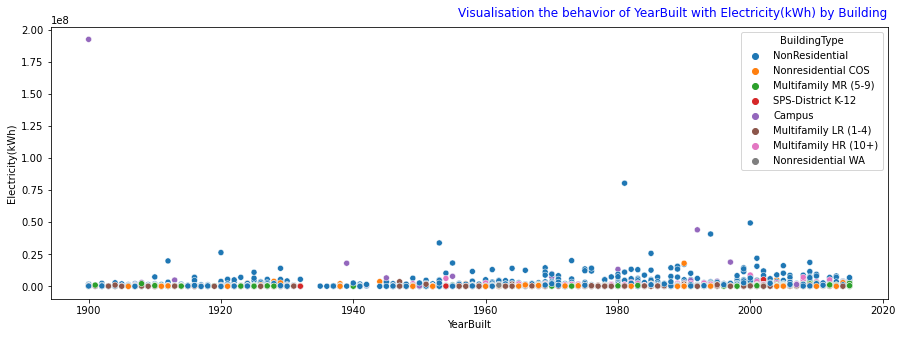

In [18]:
#Setting figure size for the notebook
plt.figure(figsize=(15,5))

#Set title of the plot
plt.title('Visualisation the behavior of YearBuilt with Electricity(kWh) by Building', color = 'blue',
          loc='right', pad=10.0)

#PLotting YearBuilt with Electricity(kWh) by BuildingType
sns.scatterplot(x=energy['YearBuilt'], y=energy['Electricity(kWh)'], hue=energy['BuildingType'])

Visualizing the behavior of the Electricity(kWh) with SiteEnergyUse(kBtu)

<AxesSubplot:title={'right':'Visualization the behavior of the Electricity(kWh) with SiteEnergyUse(kBtu)'}, xlabel='Electricity(kWh)', ylabel='SiteEnergyUse(kBtu)'>

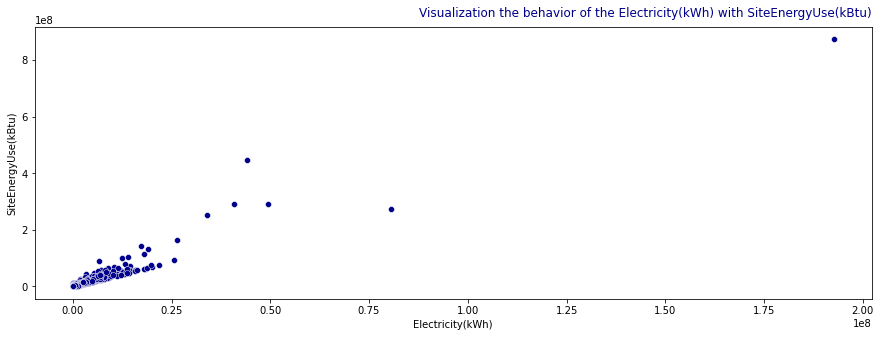

In [19]:
#Setting figure size for the notebook
plt.figure(figsize=(15,5))

#Set title of the plot
plt.title('Visualization the behavior of the Electricity(kWh) with SiteEnergyUse(kBtu)', color ='darkblue',
          loc='right', pad=10.0)

#PLotting Electricity(kWh) with SiteEnergyUse(kBtu)
sns.scatterplot(x=energy['Electricity(kWh)'], y=energy['SiteEnergyUse(kBtu)'], color='darkblue')

Visualizing the distribution of the ENERGYSTARScore by BuildingType

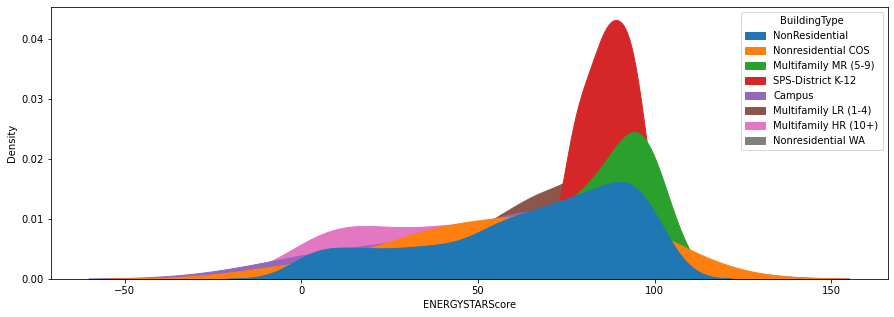

In [20]:
# Set figure size for the notebook
plt.figure(figsize=(15,5))

# Without transparency
sns.kdeplot(data=energy, x=energy['ENERGYSTARScore'], hue=energy['BuildingType'], fill=True, common_norm=False, alpha=1, warn_singular=False)

#show
plt.show()

Visualizing the behavior of PropertyGFATotal by BuildingType

<AxesSubplot:title={'right':'Visualizing the behavior of PropertyGFATotal by BuildingType'}, xlabel='BuildingType', ylabel='PropertyGFATotal'>

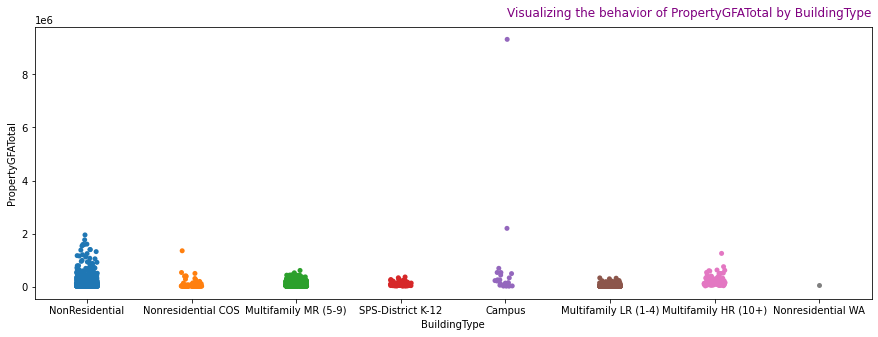

In [21]:
#Setting figure size for the notebook
plt.figure(figsize=(15,5))

#Set title of the plot
plt.title('Visualizing the behavior of PropertyGFATotal by BuildingType', color= 'purple',
          loc='right', pad=10.0)

#PLotting BuildingType with PropertyGFATotal
sns.stripplot(x="BuildingType", y="PropertyGFATotal", data=energy)

Visualizing the behavior of the Electricity(kWh) with SiteEnergyUseWN(kBtu) by ENERGYSTARScore

<AxesSubplot:title={'right':'Visualization the behavior of the Electricity(kWh) with SiteEnergyUseWN(kBtu) by ENERGYSTARScore'}, xlabel='Electricity(kWh)', ylabel='SiteEnergyUseWN(kBtu)'>

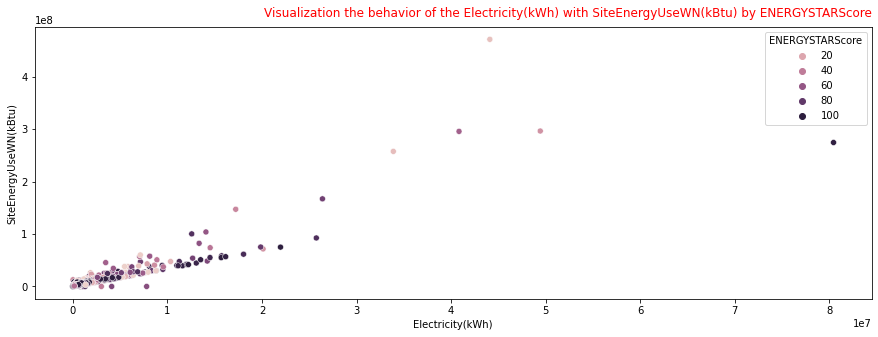

In [22]:
#Setting figure size for the notebook
plt.figure(figsize=(15,5))

#Set title of the plot
plt.title('Visualization the behavior of the Electricity(kWh) with SiteEnergyUseWN(kBtu) by ENERGYSTARScore', color = 'red',
          loc='right', pad=10.0)

#PLotting Electricity(kWh) with SiteEnergyUseWN(kBtu) by ENERGYSTARScore
sns.scatterplot(x=energy['Electricity(kWh)'], y=energy['SiteEnergyUseWN(kBtu)'], hue=energy['ENERGYSTARScore'], color='red')

Visualizing the behavior of NumberofBuildings with SiteEnergyUse(kBtu) by YearBuilt

<AxesSubplot:title={'right':'Visualization the behavior of NumberofBuildings with SiteEnergyUse(kBtu) by YearBuilt'}, xlabel='SiteEnergyUse(kBtu)', ylabel='NumberofBuildings'>

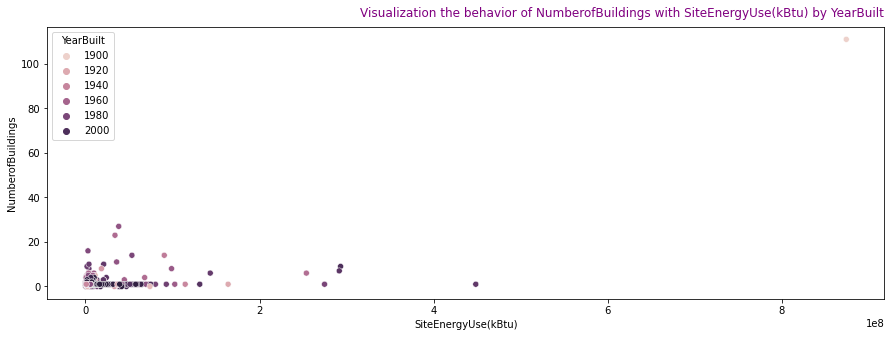

In [23]:
# Set figure size for the notebook
plt.figure(figsize=(15,5))

#Set title of the plot
plt.title('Visualization the behavior of NumberofBuildings with SiteEnergyUse(kBtu) by YearBuilt', color = 'purple',
          loc='right', pad=10.0)

#Plotting NumberofBuildings and SiteEnergyUse(kBtu) by YearBuilt
sns.scatterplot(x=energy['SiteEnergyUse(kBtu)'], y=energy['NumberofBuildings'], 
                hue=energy['YearBuilt'])

Visualizing the behavior of SiteEnergyUseWN(kBtu) with SiteEnergyUse(kBtu) by BuildingType

<AxesSubplot:title={'right':'Visualization the behavior of SiteEnergyUseWN(kBtu) with SiteEnergyUse(kBtu) by BuildingType'}, xlabel='SiteEnergyUseWN(kBtu)', ylabel='SiteEnergyUse(kBtu)'>

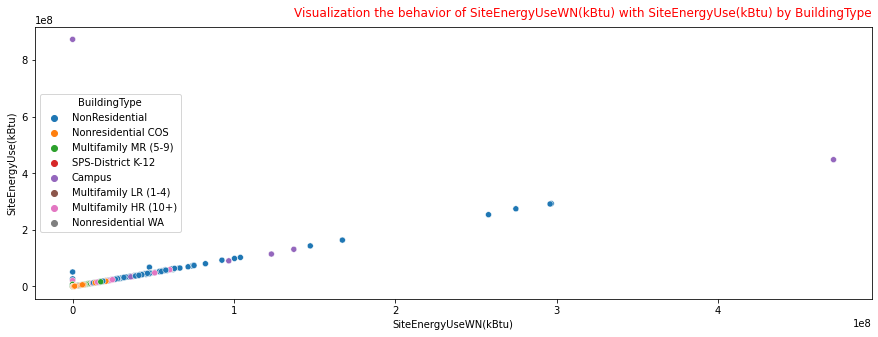

In [24]:
# Set figure size for the notebook
plt.figure(figsize=(15,5))

#Set title of the plot
plt.title('Visualization the behavior of SiteEnergyUseWN(kBtu) with SiteEnergyUse(kBtu) by BuildingType', color ='red',
          loc='right', pad=10.0)

#Plotting SiteEnergyUseWN(kBtu) with SiteEnergyUse(kBtu) by BuildingType
sns.scatterplot(x=energy['SiteEnergyUseWN(kBtu)'], y=energy['SiteEnergyUse(kBtu)'], hue=energy['BuildingType'], color='red', data=energy)

**- Multivariate Analysis**

Large Exploration of our Dataset with PairPlot

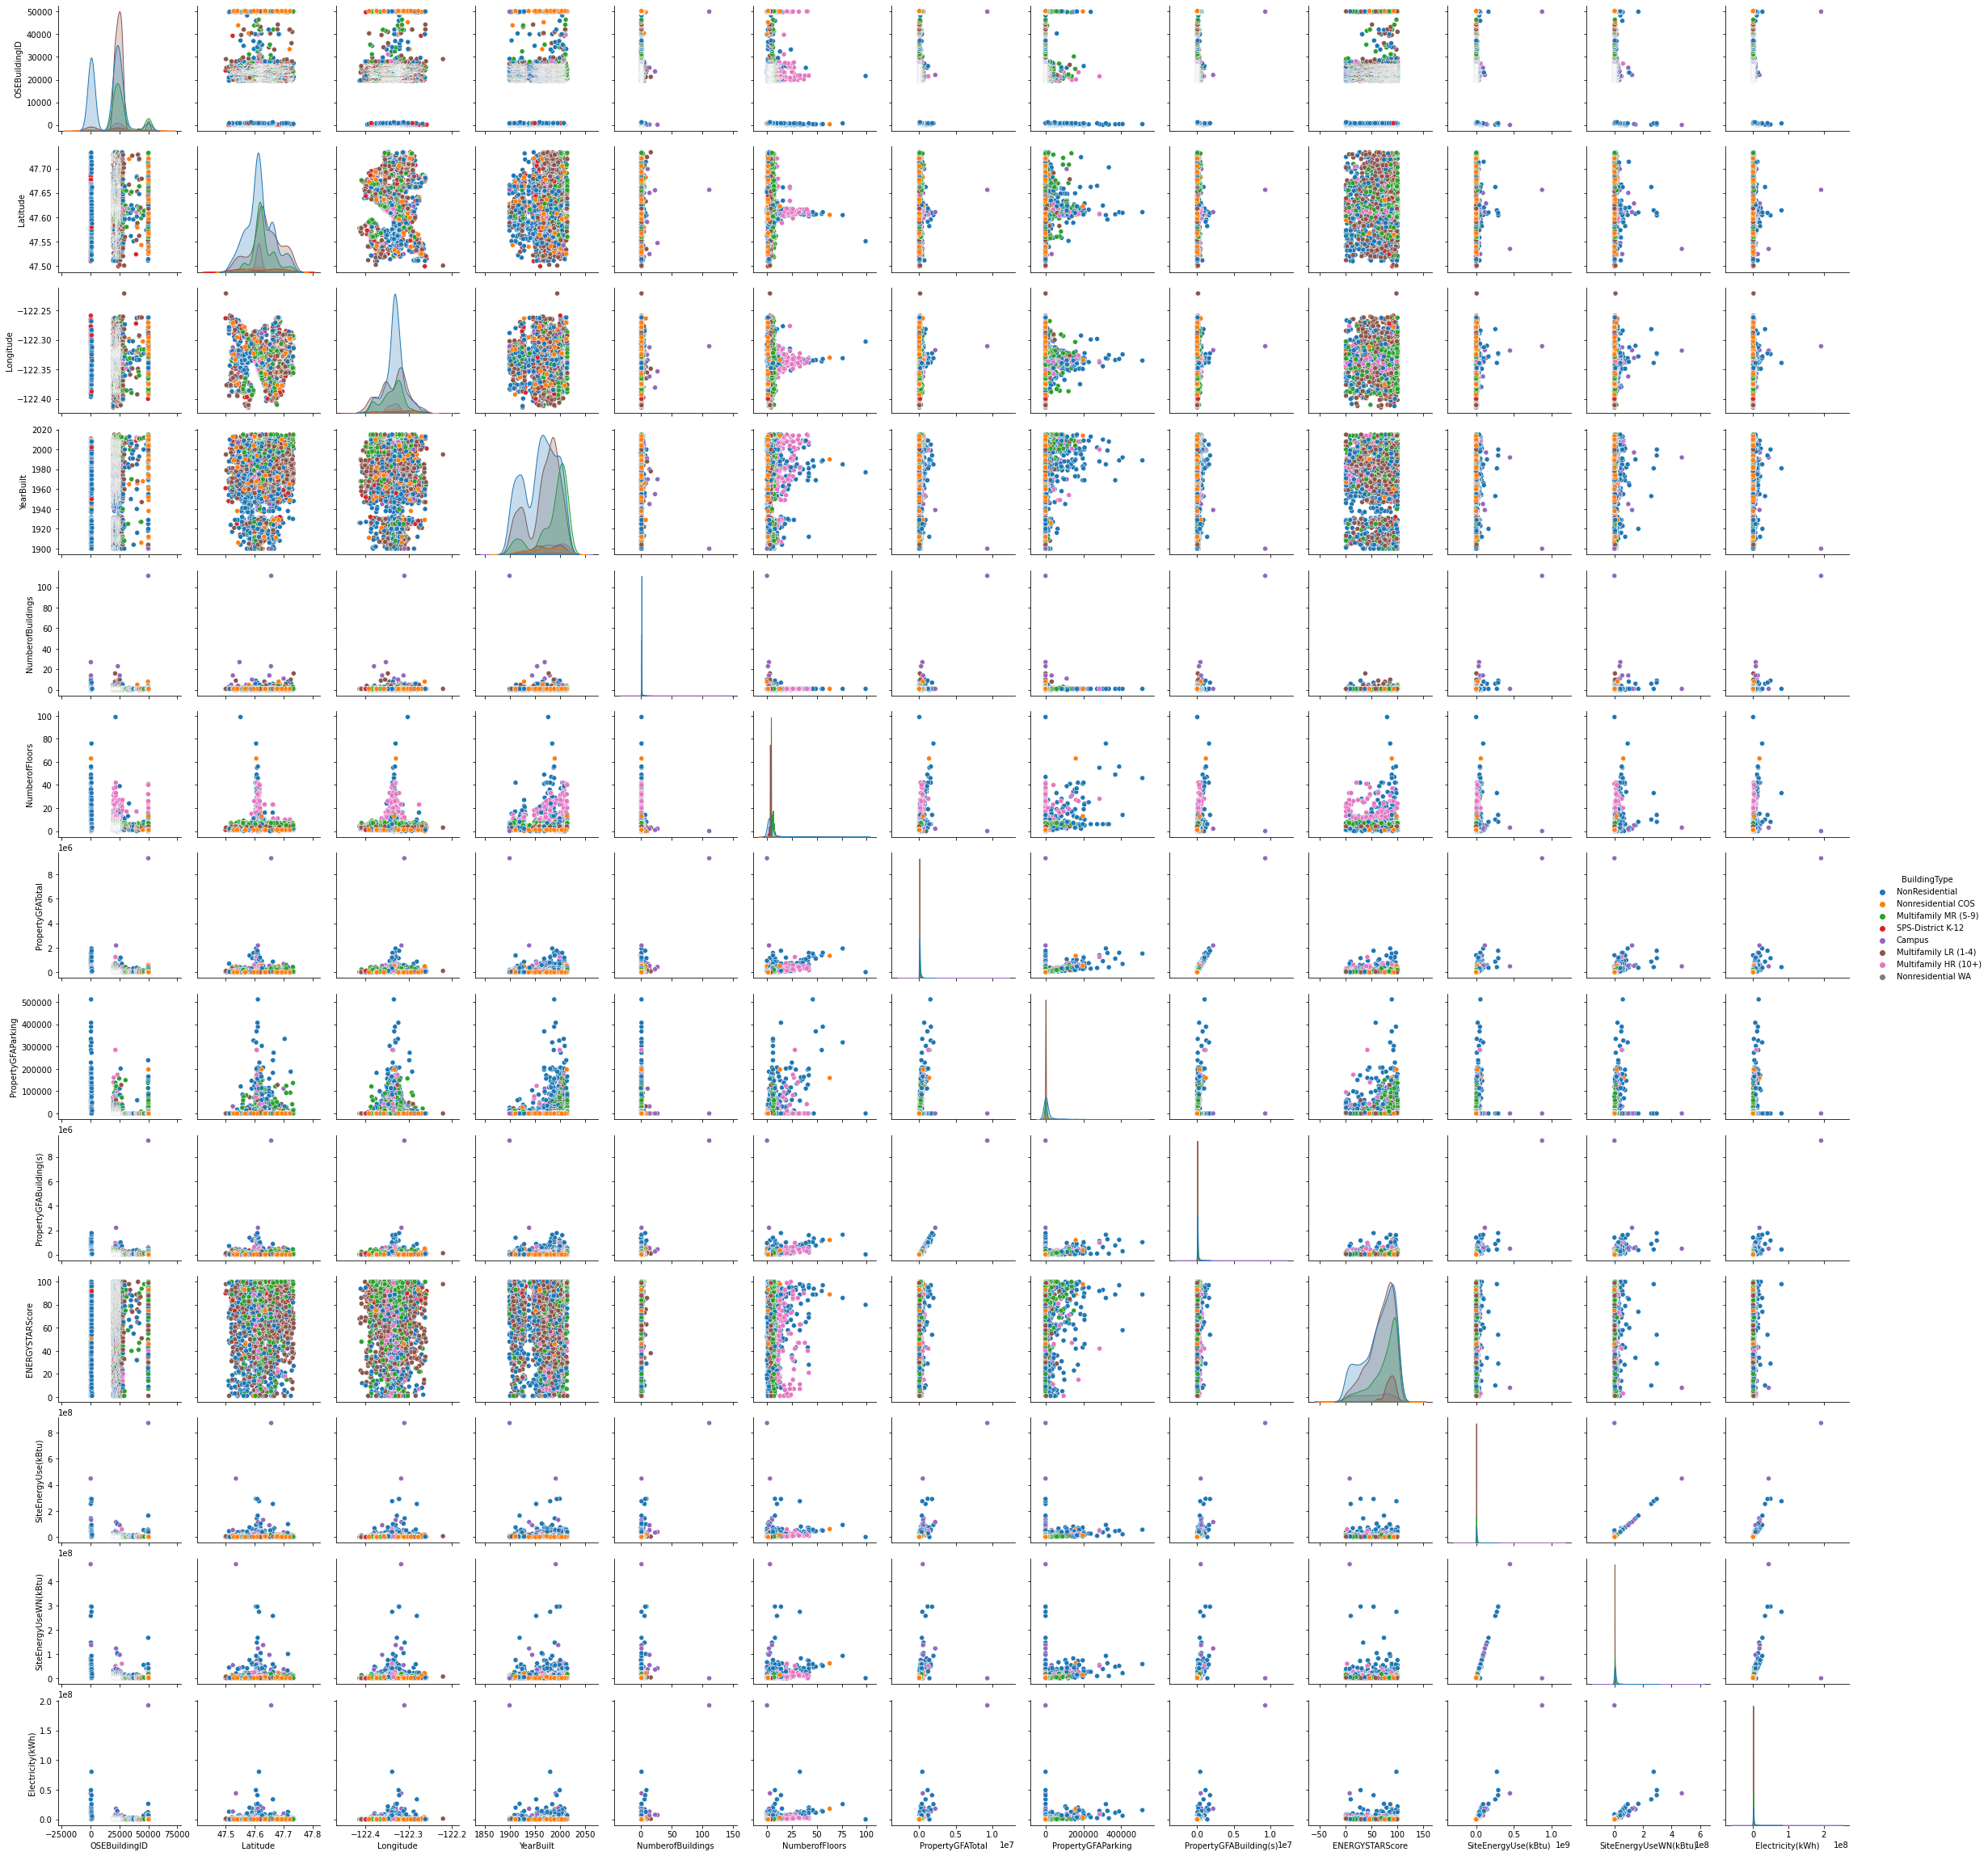

In [25]:
#Plotting the Dataset
sns.pairplot(energy, hue ='BuildingType')

#Show
plt.show()

**DATA PREPROCESSING**

**- Realizing an ACP & Printing correlation matrix**

In [26]:
# making another copies of our Dataset
dataset = energy.copy()

Correlation Matrix

In [27]:
# Correlation 
correlate = dataset.corr()
round(correlate,2)

,OSEBuildingID,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ENERGYSTARScore,SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),Electricity(kWh)
OSEBuildingID,1.00,0.09,0.04,0.18,0.03,-0.10,-0.14,-0.21,-0.11,0.08,-0.12,-0.20,-0.13
Latitude,0.09,1.00,0.01,0.12,0.02,-0.02,-0.02,-0.00,-0.02,0.08,-0.02,-0.04,-0.02
Longitude,0.04,0.01,1.00,-0.05,0.02,-0.03,0.03,-0.00,0.03,-0.03,0.03,0.03,0.03
YearBuilt,0.18,0.12,-0.05,1.00,-0.02,0.15,0.10,0.18,0.08,0.03,0.03,0.07,0.04
NumberofBuildings,0.03,0.02,0.02,-0.02,1.00,-0.03,0.69,-0.00,0.73,-0.00,0.69,0.09,0.74
NumberofFloors,-0.10,-0.02,-0.03,0.15,-0.03,1.00,0.40,0.42,0.36,0.02,0.21,0.29,0.25
PropertyGFATotal,-0.14,-0.02,0.03,0.10,0.69,0.40,1.00,0.40,0.99,0.07,0.80,0.40,0.85
PropertyGFAParking,-0.21,-0.00,-0.00,0.18,-0.00,0.42,0.40,1.00,0.27,0.05,0.17,0.24,0.22
PropertyGFABuilding(s),-0.11,-0.02,0.03,0.08,0.73,0.36,0.99,0.27,1.00,0.06,0.81,0.38,0.86
ENERGYSTARScore,0.08,0.08,-0.03,0.03,-0.00,0.02,0.07,0.05,0.06,1.00,-0.09,-0.09,-0.06


<AxesSubplot:>

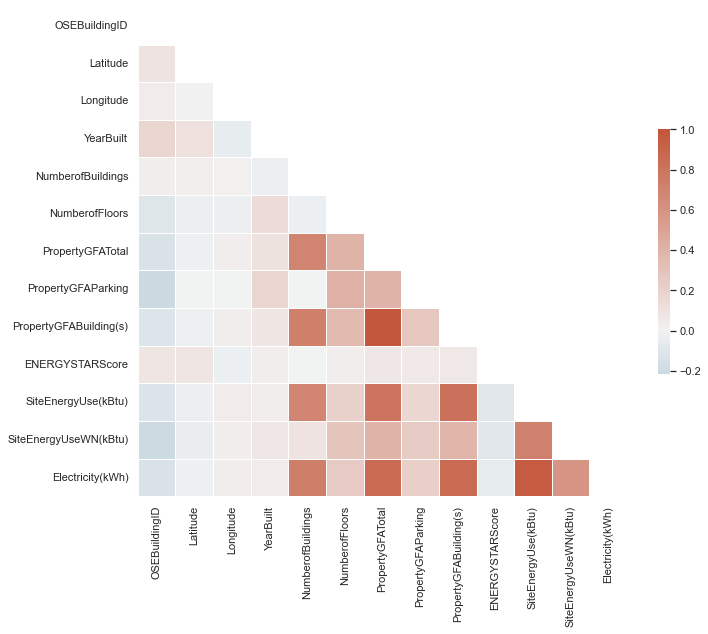

In [28]:
# CORRELATION MATRIX 

from string import ascii_letters

sns.set_theme(style="white")

# Generate a large random dataset
rs = np.random.RandomState(33)
d = pd.DataFrame(data=rs.normal(size=(100, 26)),
                 columns=list(ascii_letters[26:]))

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlate, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlate, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

From the results of the correlation matrix, we can deduce that SiteEnergyUseWN and SiteEnergyUse are Highly correlated. So we have to drop one. Same goes to Electricity and SiteEnergyUseWN.

**- Identifing the most important variables**

In [29]:
# Removing useless features
newdata = dataset.drop(columns=['Electricity(kWh)', 'Longitude', 'Latitude', 'SiteEnergyUseWN(kBtu)'])

#Printing the shape
print(newdata.shape)

(3376, 13)


**- Checking columns with null values and outliers**

In [30]:
# Getting unique values
newdata.apply(lambda x: len(x.unique()))

OSEBuildingID             3376
BuildingType                 8
PrimaryPropertyType         24
PropertyName              3362
YearBuilt                  113
NumberofBuildings           18
NumberofFloors              50
PropertyGFATotal          3195
PropertyGFAParking         496
PropertyGFABuilding(s)    3193
LargestPropertyUseType      57
ENERGYSTARScore            101
SiteEnergyUse(kBtu)       3355
dtype: int64

In [31]:
# Checking columns with null values
newdata.columns[newdata.isnull().any()]

Index(['NumberofBuildings', 'LargestPropertyUseType', 'ENERGYSTARScore',
       'SiteEnergyUse(kBtu)'],
      dtype='object')

In [32]:
# Checking null values
newdata.isnull().sum()

OSEBuildingID               0
BuildingType                0
PrimaryPropertyType         0
PropertyName                0
YearBuilt                   0
NumberofBuildings           8
NumberofFloors              0
PropertyGFATotal            0
PropertyGFAParking          0
PropertyGFABuilding(s)      0
LargestPropertyUseType     20
ENERGYSTARScore           843
SiteEnergyUse(kBtu)         5
dtype: int64

In [33]:
# imputing missing values and outliers

newdata['NumberofBuildings'] = newdata['NumberofBuildings'].replace(0, np.NaN)
newdata['NumberofBuildings'].fillna(newdata['NumberofBuildings'].median(), inplace = True)

newdata['SiteEnergyUse(kBtu)'] = newdata['SiteEnergyUse(kBtu)'].replace(0, np.NaN)
newdata['SiteEnergyUse(kBtu)'].fillna(newdata['SiteEnergyUse(kBtu)'].median(), inplace = True)

newdata['LargestPropertyUseType'] = newdata['LargestPropertyUseType'].replace(0, np.NaN)
newdata['LargestPropertyUseType'].fillna('Unknown', inplace=True)

newdata['ENERGYSTARScore'] = newdata['ENERGYSTARScore'].replace(0, np.NaN)
newdata['ENERGYSTARScore'].fillna(newdata['ENERGYSTARScore'].median(), inplace = True)

newdata.isnull().sum()

OSEBuildingID             0
BuildingType              0
PrimaryPropertyType       0
PropertyName              0
YearBuilt                 0
NumberofBuildings         0
NumberofFloors            0
PropertyGFATotal          0
PropertyGFAParking        0
PropertyGFABuilding(s)    0
LargestPropertyUseType    0
ENERGYSTARScore           0
SiteEnergyUse(kBtu)       0
dtype: int64

**- Mangemenent of Outliers**

After the visualisation, we notice that there are some outliers in our dataset. So we'll check for outliers and erase all of them because Regression is very sensitive to outliers.

First of All, We are going to convert SiteEnergyUse in log for high efficence Modelling

In [34]:
# Converting SiteEnergyUse(kBtu) in log

newdata['SiteEnergyUse(kBtu)'] = np.log(newdata['SiteEnergyUse(kBtu)'])

In [35]:
# Observe mean and std ... 
newdata['SiteEnergyUse(kBtu)'].describe()

count    3376.000000
mean       14.582695
std         1.155866
min         9.503681
25%        13.752197
50%        14.410716
75%        15.254925
max        20.588504
Name: SiteEnergyUse(kBtu), dtype: float64

Calculating the z score to get the outliers

In [36]:
# if we find z score exceeding 3, we'll consider as an outlier 
threshold = 3
mean = newdata['SiteEnergyUse(kBtu)'].mean()
std = newdata['SiteEnergyUse(kBtu)'].std()

#storing the outliers in an array
outliers = []
for i in newdata['SiteEnergyUse(kBtu)']:
    z = (i-mean)/std
    if z > threshold:
        outliers.append(i)

# displaying all the rows that contains an outlier
outliers_index = newdata[newdata['SiteEnergyUse(kBtu)'].isin(outliers)].index
outliers_index

Int64Index([   2,   35,   49,  124,  167,  170,  231,  309,  340,  477,  558,
             559,  618, 1494, 1672, 1690, 2325, 3264, 3274],
           dtype='int64')

Dropping Outliers of the Dataset

In [37]:
# making copies before removing outliers
newdata = newdata.copy()

#removing outliers in the dataset
newdata.drop(outliers_index,  inplace = True)

#Printing the Shape of Dataset
newdata.shape

(3357, 13)

Renaming SiteEnergyUse(kBtu) for Splitting

In [38]:
#Rename SiteEnergyUse(kBtu) in SiteEnergyUse for Splitting
newdata = newdata.rename(columns={"SiteEnergyUse(kBtu)": "SiteEnergyUse"})

**MODEL BUILDING**

The First step before modelling is turning the categorical values into numerical values using encoding.

In [39]:
# label encoding
from sklearn.preprocessing import LabelEncoder

newdata = newdata.apply(LabelEncoder().fit_transform)

Splitting the data into dependent and independent variables

In [40]:
# splitting the data into dependent and independent variables

x = newdata.drop('SiteEnergyUse', axis = 1)
y = newdata.SiteEnergyUse

print(x.shape)
print(y.shape)

(3357, 12)
(3357,)


In [41]:
# making x_train, x_test, y_train, y_test

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2685, 12)
(2685,)
(672, 12)
(672,)


In [42]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

x_train = pd.DataFrame(x_train)
x_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,-1.048989,-1.003163,-0.564772,-1.141255,0.577587,-0.127727,-0.126684,-1.244984,-0.359819,-1.199440,-0.325451,0.444348
1,-0.054723,-1.003163,-0.564772,1.521738,0.237047,-0.127727,-0.331593,-1.631120,-0.359819,-1.609235,-0.325451,0.233050
2,1.067568,-0.175923,-0.219072,1.522774,1.011002,-0.127727,0.283132,0.781686,-0.359819,0.855002,-0.325451,1.078242
3,-0.155905,-1.003163,-0.564772,0.057040,-0.010619,-0.127727,-0.331593,-0.748679,-0.359819,-0.694571,-0.325451,-0.696662
4,1.174944,-1.003163,-0.564772,1.270884,-0.134452,-0.127727,-0.126684,-1.045371,-0.359819,-0.993995,-0.325451,0.444348


**- Running Regression Algorithms**

- Linear Regression

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

model_lr = LinearRegression()

#Starting the modelling
start_lr = time.time()
model_lr.fit(x_train, y_train)

# predicting the  test set results
y_pred = model_lr.predict(x_test)

#Ending the modelling
end_lr = time.time()

# finding the rmse,r2, mae and execution time of the model
score_one = round(r2_score(y_test, y_pred), 3)
mae_one = round(mean_absolute_error(y_test, y_pred), 3)
rmse_one = round(mean_squared_error(y_test, y_pred), 3)
ex_time_lr = round(end_lr - start_lr, 3)

- GradientBoostingRegressor (XgBoost Regressor)

In [44]:
from sklearn.ensemble import GradientBoostingRegressor

model_gb = GradientBoostingRegressor()

#Starting the modelling
start_gb = time.time()

model_gb.fit(x_train, y_train)

# predicting the test set results
y_pred = model_gb.predict(x_test)

#Ending the modelling
end_gb = time.time()

# finding the rmse,r2, mae and execution time of the model
score_two = round(r2_score(y_test, y_pred), 3)
mae_two = round(mean_absolute_error(y_test, y_pred), 3)
rmse_two = round(mean_squared_error(y_test, y_pred), 3)
ex_time_gb = round(end_gb - start_gb, 3)

- RandomForestRegressor

In [45]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor(n_estimators = 100 , n_jobs = -1)

#Starting the modelling
start_rf = time.time()

model_rf.fit(x_train, y_train)

# predicting the  test set results
y_pred = model_rf.predict(x_test)

#Ending the modelling
end_rf = time.time()

# finding the rmse,r2, mae and execution time of the model
score_three = round(r2_score(y_test, y_pred), 3)
mae_three = round(mean_absolute_error(y_test, y_pred), 3)
rmse_three = round(mean_squared_error(y_test, y_pred), 3)
ex_time_rf = round(end_rf - start_rf, 3)

- DecisionTreeRegressor

In [46]:
from sklearn.tree import DecisionTreeRegressor

model_dt = DecisionTreeRegressor()

#Starting the modelling
start_dt = time.time()

model_dt.fit(x_train, y_train)

# predicting the test set results
y_pred = model_dt.predict(x_test)

#Ending the modelling
end_dt = time.time()

# finding the rmse,r2, mae and execution time of the model
score_fourth = round(r2_score(y_test, y_pred), 3)
mae_fourth = round(mean_absolute_error(y_test, y_pred), 3)
rmse_fourth = round(mean_squared_error(y_test, y_pred), 3)
ex_time_dt = round(end_dt - start_dt, 3)

- Support Vector Regression

In [47]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

# instantiating the model
model_lasso = Lasso()

#Starting the modelling
start_lasso = time.time()
model_lasso.fit(x_train, y_train)

# predicting the  test set results
y_pred = model_lasso.predict(x_test)

#Ending the modelling
end_lasso = time.time()

# finding the rmse,r2, mae and execution time of the model
score_five = round(r2_score(y_test, y_pred), 3)
mae_five = round(mean_absolute_error(y_test, y_pred), 3)
rmse_five = round(mean_squared_error(y_test, y_pred), 3)
ex_time_lasso = round(end_lasso - start_lasso, 3)

- Cross Validation

Here we are going to test our model in five random datasets

In [48]:
### Validation croise
from sklearn.model_selection import cross_val_score

cvs_rf = cross_val_score(estimator=model_rf , X = x_train, y = y_train , cv =5)
cvs_dt = cross_val_score(estimator=model_dt , X = x_train, y = y_train , cv =5)
cvs_gb = cross_val_score(estimator=model_gb , X = x_train, y = y_train , cv =5)
cvs_lr = cross_val_score(estimator=model_lr , X = x_train, y = y_train , cv =5)
cvs_lasso = cross_val_score(estimator=model_lasso , X = x_train, y = y_train , cv =5)

**Storing the results in Dataframe**

In [49]:
models = pd.DataFrame({
    'Model':["Linear Regression", "XgBoost Regressor","Random Forest Regression", "Decision Tree Regressor", "Lasso Regression"],
    "Score":[score_one, score_two, score_three, score_fourth, score_five], 
    "MAE": [mae_one, mae_two, mae_three, mae_fourth, mae_five] ,
    "RMSE": [rmse_one, rmse_two, rmse_three, rmse_fourth, rmse_five] ,
    "EX_TIME": [ex_time_lr, ex_time_gb, ex_time_rf, ex_time_dt, ex_time_lasso] ,
    "CROSS": [round(cvs_lr.mean()*100 , 2), round(cvs_gb.mean()*100 , 2), 
              round(cvs_rf.mean()*100 , 2), round(cvs_dt.mean()*100 , 2), 
              round(cvs_lasso.mean()*100 , 2)] ,
})
models.sort_values(by='Score',ascending=False)

,Model,Score,MAE,RMSE,EX_TIME,CROSS
1,XgBoost Regressor,0.797,323.392,195877.669,0.899,75.84
2,Random Forest Regression,0.797,317.332,195644.918,1.386,73.79
0,Linear Regression,0.696,417.548,293649.934,0.968,66.13
4,Lasso Regression,0.696,417.609,293596.537,0.214,66.13
3,Decision Tree Regressor,0.560,436.805,424546.451,0.045,44.68


**Optimization Modelling**

We will optimize the model RandomForest with GridSearch.

In [50]:
# Importing GridSearch
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

#setting the hyperparameters
param_grid = [
    {'n_estimators': [30, 50, 80, 100], 'max_features': [2, 4, 6, 8, 10, 12]},
]

grid_search = GridSearchCV(model_rf, param_grid, cv=5, verbose=2, 
                           scoring='neg_mean_squared_error', 
                           return_train_score=True)

grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END ....................max_features=2, n_estimators=30; total time=   0.1s
[CV] END ....................max_features=2, n_estimators=30; total time=   0.1s
[CV] END ....................max_features=2, n_estimators=30; total time=   0.1s
[CV] END ....................max_features=2, n_estimators=30; total time=   0.1s
[CV] END ....................max_features=2, n_estimators=30; total time=   0.1s
[CV] END ....................max_features=2, n_estimators=50; total time=   0.2s
[CV] END ....................max_features=2, n_estimators=50; total time=   0.2s
[CV] END ....................max_features=2, n_estimators=50; total time=   0.2s
[CV] END ....................max_features=2, n_estimators=50; total time=   0.2s
[CV] END ....................max_features=2, n_estimators=50; total time=   0.2s
[CV] END ....................max_features=2, n_estimators=80; total time=   0.3s
[CV] END ....................max_features=2, n_

GridSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1),
             param_grid=[{'max_features': [2, 4, 6, 8, 10, 12],
                          'n_estimators': [30, 50, 80, 100]}],
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=2)

In [51]:
# displaying the best parameters
grid_search.best_params_

{'max_features': 4, 'n_estimators': 80}

In [52]:
# displaying the results
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

490.2284796600578 {'max_features': 2, 'n_estimators': 30}
492.0503340076302 {'max_features': 2, 'n_estimators': 50}
486.13349934481005 {'max_features': 2, 'n_estimators': 80}
485.45913754966597 {'max_features': 2, 'n_estimators': 100}
485.8345714189628 {'max_features': 4, 'n_estimators': 30}
486.1732754598119 {'max_features': 4, 'n_estimators': 50}
481.5749596241719 {'max_features': 4, 'n_estimators': 80}
484.85087496781705 {'max_features': 4, 'n_estimators': 100}
491.33444097231603 {'max_features': 6, 'n_estimators': 30}
487.2203572587811 {'max_features': 6, 'n_estimators': 50}
485.57619911197185 {'max_features': 6, 'n_estimators': 80}
483.5524846133219 {'max_features': 6, 'n_estimators': 100}
487.83859431734646 {'max_features': 8, 'n_estimators': 30}
484.28504457956 {'max_features': 8, 'n_estimators': 50}
486.6519772698758 {'max_features': 8, 'n_estimators': 80}
484.75006980314373 {'max_features': 8, 'n_estimators': 100}
499.2572941446854 {'max_features': 10, 'n_estimators': 30}
488.

In [53]:
# Displaying the best estimator
grid_search.best_estimator_

RandomForestRegressor(max_features=4, n_estimators=80, n_jobs=-1)

`Pernel AVOUGNASSOU`